<a href="https://colab.research.google.com/github/francianerod/TCC-MBA-USP-ESALQ/blob/main/TCC_MBA_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Código feito por:** Franciane Rodrigues

**Objetivo:** Identificação dos níveis de risco de queda de raios a partir de dados de campo elétrico para São José dos Campos/SP

**Técnica:** Algoritmo não-supervisionado K-means

**Desenvolvido para**: TCC do MBA Esalq/USP

**Curso**: Data Science e Analytics

# **1) IMPORTANDO PACOTES E ORGANIZANDO DADOS**

In [1]:
# Comando de abertura para Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importação de bibliotecas
import pandas as pd
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

#Função leitura de data e hora
dateparse = lambda x: datetime.strptime(x, '%Y %m %d %H %M %S')

In [3]:
# Abertura e organização da base de dados
data_aer = pd.read_csv('/content/drive/MyDrive/Mapas e Códigos/Códigos TCC MBA/Dados/aer/aeroporto20111128.txt', 
                    sep='\s+', 
                    header=None,
                    parse_dates={ 'horario': [0, 1, 2, 3, 4, 5]},
                    date_parser=dateparse,
                    names=['ano', 'mes', 'dia', 'hora', 'm', 's', 'E'])

In [4]:
# Abertura e organização da base de dados
data_bin = pd.read_csv('/content/drive/MyDrive/Mapas e Códigos/Códigos TCC MBA/Dados/bin/binfa20111128.txt', 
                    sep='\s+', 
                    header=None,
                    parse_dates={ 'horario': [0, 1, 2, 3, 4, 5]},
                    date_parser=dateparse,
                    names=['ano', 'mes', 'dia', 'hora', 'm', 's', 'E'])

In [5]:
# União dos dois dataframe com valor do campo elétrico
uniao = data_aer.merge(data_bin, on = "horario", how = "left")

In [6]:
#Apagando coluna 
del uniao['horario']

In [7]:
# Mostrando a base de dados para se trabalhar
uniao.head()

,E_x,E_y
0,1.09,-7.62
1,1.09,-7.62
2,1.09,-7.62
3,1.09,-7.62
4,1.09,-7.62


In [8]:
# Transformando em valores absolutos
uniao['E_aer']=(uniao.E_x).abs()
uniao.head()

,E_x,E_y,E_aer
0,1.09,-7.62,1.09
1,1.09,-7.62,1.09
2,1.09,-7.62,1.09
3,1.09,-7.62,1.09
4,1.09,-7.62,1.09


In [9]:
# Transformando em valores absolutos
uniao['E_bin']=(uniao.E_y).abs()
uniao

,E_x,E_y,E_aer,E_bin
0,1.09,-7.62,1.09,7.62
1,1.09,-7.62,1.09,7.62
2,1.09,-7.62,1.09,7.62
3,1.09,-7.62,1.09,7.62
4,1.09,-7.62,1.09,7.62
...,...,...,...,...
86397,-11.88,-7.62,11.88,7.62
86398,-11.88,-7.62,11.88,7.62
86399,-11.88,-7.62,11.88,7.62
86400,-11.88,-7.62,11.88,7.62


In [10]:
# Retirada de colunas
uniao = uniao.drop(uniao.columns[[0,1]], axis=1)
uniao.head()

,E_aer,E_bin
0,1.09,7.62
1,1.09,7.62
2,1.09,7.62
3,1.09,7.62
4,1.09,7.62


# **2) TAREFA DE MACHINE LEARNING NÃO-SUPERVISIONADA - DADOS ABSOLUTOS**

In [11]:
# Importação das bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [12]:
# Carregamento da base de dados
uniao.head()

,E_aer,E_bin
0,1.09,7.62
1,1.09,7.62
2,1.09,7.62
3,1.09,7.62
4,1.09,7.62


In [13]:
# Agrupamento com k-means, utilizando 4 clusters (de acordo com a base de dados)
kmeans = KMeans(n_clusters = 5)
kmeans.fit(uniao)

KMeans(n_clusters=5)

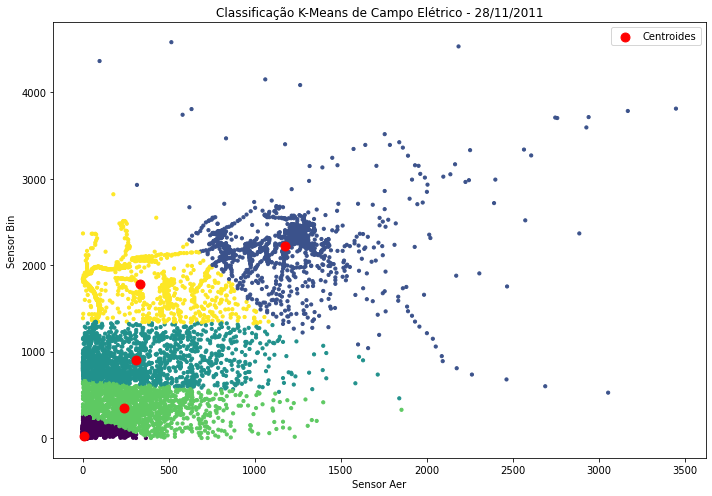

In [14]:
# Gráfico do agrupamento
plt.figure(figsize=(10, 7))
plt.scatter(uniao.iloc[:, 0], uniao.iloc[:,1], s = 10, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 80, c = 'red',label = 'Centroides')

plt.title('Classificação K-Means de Campo Elétrico - 28/11/2011')
plt.xlabel('Sensor Aer')
plt.ylabel('Sensor Bin')

plt.tight_layout()
plt.legend()
plt.show()

In [15]:
# Visualização dos cinco centroides
centroides = kmeans.cluster_centers_
centroides

array([[   6.87232423,   24.9811767 ],
       [1172.2340169 , 2222.94288786],
       [ 308.76897819,  903.66001148],
       [ 237.84129934,  349.72909539],
       [ 331.48403679, 1777.77189739]])

In [16]:
agrup = kmeans.labels_
quantidade = np.unique(agrup, return_counts = True)
quantidade

(array([0, 1, 2, 3, 4], dtype=int32),
 array([79898,  1302,  1732,  2439,  1031]))

In [17]:
uniao['class'] = kmeans.labels_
uniao

,E_aer,E_bin,class
0,1.09,7.62,0
1,1.09,7.62,0
2,1.09,7.62,0
3,1.09,7.62,0
4,1.09,7.62,0
...,...,...,...
86397,11.88,7.62,0
86398,11.88,7.62,0
86399,11.88,7.62,0
86400,11.88,7.62,0


In [18]:
#Variáveis estátisticas
resumo = uniao.groupby('class').agg({'E_aer':['mean', 'std', 'min', 'max'], 
                                     'E_bin':['mean', 'std', 'min', 'max']})
resumo

E_aer                                    E_bin              \
              mean         std    min      max         mean         std   
class                                                                     
0         6.883791   13.232048   1.09   366.58    24.988313   27.425695   
1      1172.234017  333.866227  97.48  3446.61  2222.942888  373.592964   
2       311.006103  296.388060   1.09  1838.93   905.895364  198.225790   
3       237.119504  221.721803   1.09  1851.86   351.646162  142.612722   
4       330.534500  253.069277   1.09  1079.68  1778.646402  261.055848   

                         
           min      max  
class                    
0         1.22   250.18  
1       525.77  4579.60  
2       460.40  1343.76  
3         1.22   659.73  
4      1326.85  2820.39

# **3) TAREFA DE MACHINE LEARNING NÃO-SUPERVISIONADA - DADOS BRUTOS**

In [19]:
# União dos dois dataframe com valor do campo elétrico
uniao2 = data_aer.merge(data_bin, on = "horario", how = "left")

#Apagando coluna 
del uniao2['horario']

uniao2.head()

,E_x,E_y
0,1.09,-7.62
1,1.09,-7.62
2,1.09,-7.62
3,1.09,-7.62
4,1.09,-7.62


In [20]:
# Agrupamento com k-means, utilizando 5 clusters (de acordo com a base de dados)
kmeans = KMeans(n_clusters = 5)
kmeans.fit(uniao2)

KMeans(n_clusters=5)

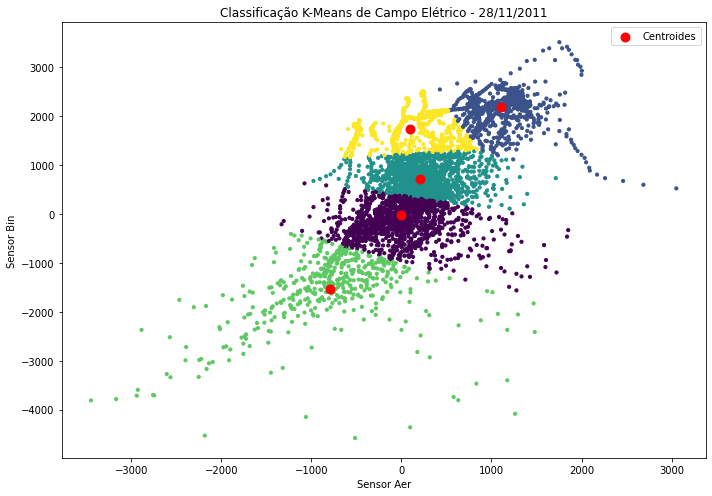

In [21]:
#Visualização do agrupamento
plt.figure(figsize=(10, 7))
plt.scatter(uniao2.iloc[:, 0], uniao2.iloc[:,1], s = 10, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 80, c = 'red',label = 'Centroides')

plt.title('Classificação K-Means de Campo Elétrico - 28/11/2011')
plt.xlabel('Sensor Aer')
plt.ylabel('Sensor Bin')

plt.tight_layout()
plt.legend()
plt.show()

In [22]:
# Visualização dos centroides
centroides2 = kmeans.cluster_centers_
centroides2

array([[   -4.34345281,   -22.27030443],
       [ 1105.74983092,  2190.08177939],
       [  204.04454373,   723.15419677],
       [ -797.88101075, -1527.97748387],
       [   90.87724731,  1745.57765591]])

In [23]:
agrup2 = kmeans.labels_
quantidade2 = np.unique(agrup, return_counts = True)
quantidade2

(array([0, 1, 2, 3, 4], dtype=int32),
 array([79898,  1302,  1732,  2439,  1031]))

# **4) TAREFA DE MACHINE LEARNING NÃO SUPERVISIONADA - DADOS ABSOLUTOS E PADRONIZADOS**

In [24]:
# Importação das bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [25]:
# Carregamento da base de dados
uniao.head()

,E_aer,E_bin,class
0,1.09,7.62,0
1,1.09,7.62,0
2,1.09,7.62,0
3,1.09,7.62,0
4,1.09,7.62,0


In [26]:
#Apagando coluna 
del uniao['class']

In [27]:
uniao

,E_aer,E_bin
0,1.09,7.62
1,1.09,7.62
2,1.09,7.62
3,1.09,7.62
4,1.09,7.62
...,...,...
86397,11.88,7.62
86398,11.88,7.62
86399,11.88,7.62
86400,11.88,7.62


In [28]:
# Padronizando os dados
from sklearn.preprocessing import StandardScaler

# Cria o objeto scaler
scaler = StandardScaler()

# Fit e transformação dos dados
uniao_padronizado = pd.DataFrame(scaler.fit_transform(uniao))

# Criando um dicionário de nomes
nomes= {0: "E_aer", 
        1: "E_bin"
       }

# Renomeando as colunas
uniao_padronizado = uniao_padronizado.rename(columns=nomes)
uniao_padronizado

,E_aer,E_bin
0,-0.231175,-0.276383
1,-0.231175,-0.276383
2,-0.231175,-0.276383
3,-0.231175,-0.276383
4,-0.231175,-0.276383
...,...,...
86397,-0.168522,-0.276383
86398,-0.168522,-0.276383
86399,-0.168522,-0.276383
86400,-0.168522,-0.276383


In [29]:
# Agrupamento com k-means, utilizando 5 clusters (de acordo com a base de dados)
kmeans = KMeans(n_clusters = 5)
kmeans.fit(uniao_padronizado)

KMeans(n_clusters=5)

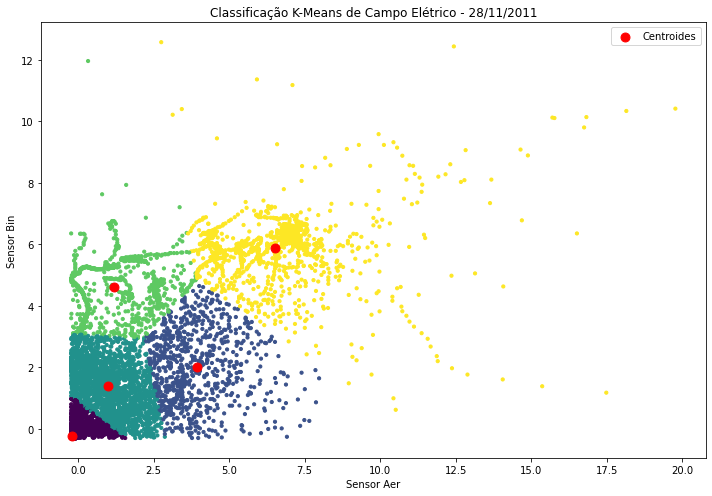

In [30]:
#Visualização do agrupamento
plt.figure(figsize=(10, 7))
plt.scatter(uniao_padronizado.iloc[:, 0], uniao_padronizado.iloc[:,1], s = 10, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 80, c = 'red',label = 'Centroides')

plt.title('Classificação K-Means de Campo Elétrico - 28/11/2011')
plt.xlabel('Sensor Aer')
plt.ylabel('Sensor Bin')

plt.tight_layout()
plt.legend()
plt.show()

# **5) TAREFA DE MACHINE LEARNING NÃO SUPERVISIONADA - DADOS BRUTOS E PADRONIZADOS**

In [31]:
# Abertura e organização da base de dados
data_aer = pd.read_csv('/content/drive/MyDrive/Mapas e Códigos/Códigos TCC MBA/Dados/aer/aeroporto20111128.txt', 
                    sep='\s+', 
                    header=None,
                    parse_dates={ 'horario': [0, 1, 2, 3, 4, 5]},
                    date_parser=dateparse,
                    names=['ano', 'mes', 'dia', 'hora', 'm', 's', 'E'])

In [32]:
# Abertura e organização da base de dados
data_bin = pd.read_csv('/content/drive/MyDrive/Mapas e Códigos/Códigos TCC MBA/Dados/bin/binfa20111128.txt', 
                    sep='\s+', 
                    header=None,
                    parse_dates={ 'horario': [0, 1, 2, 3, 4, 5]},
                    date_parser=dateparse,
                    names=['ano', 'mes', 'dia', 'hora', 'm', 's', 'E'])

In [33]:
# União dos dois dataframe com valor do campo elétrico
uniao = data_aer.merge(data_bin, on = "horario", how = "left")

In [34]:
#Apagando coluna 
del uniao['horario']

In [35]:
# Mostrando a base de dados para se trabalhar
uniao.head()

,E_x,E_y
0,1.09,-7.62
1,1.09,-7.62
2,1.09,-7.62
3,1.09,-7.62
4,1.09,-7.62


In [36]:
# Padronizando os dados
from sklearn.preprocessing import StandardScaler

# Cria o objeto scaler
scaler = StandardScaler()

# Fit e transformação dos dados
uniao_padronizado = pd.DataFrame(scaler.fit_transform(uniao))

# Criando um dicionário de nomes
nomes= {0: "E_aer", 
        1: "E_bin"
       }

# Renomeando as colunas
uniao_padronizado = uniao_padronizado.rename(columns=nomes)
uniao_padronizado

,E_aer,E_bin
0,-0.069988,-0.125257
1,-0.069988,-0.125257
2,-0.069988,-0.125257
3,-0.069988,-0.125257
4,-0.069988,-0.125257
...,...,...
86397,-0.143474,-0.125257
86398,-0.143474,-0.125257
86399,-0.143474,-0.125257
86400,-0.143474,-0.125257


In [37]:
# Agrupamento com k-means, utilizando 5 clusters (de acordo com a base de dados)
kmeans = KMeans(n_clusters = 5)
kmeans.fit(uniao_padronizado)

KMeans(n_clusters=5)

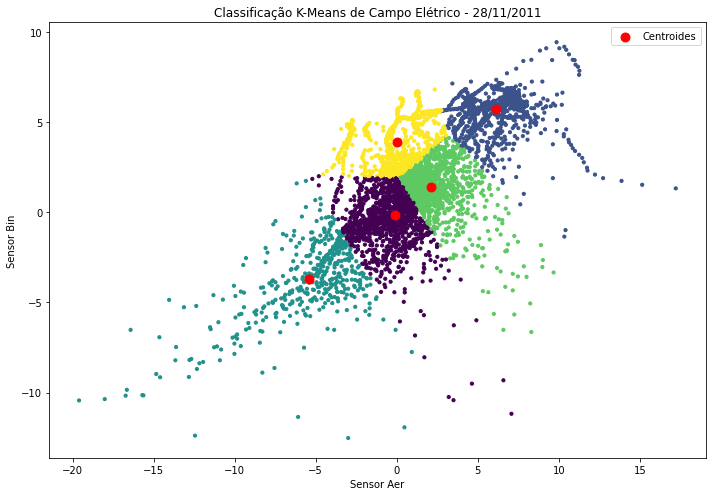

In [38]:
#Visualização do agrupamento
plt.figure(figsize=(10, 7))
plt.scatter(uniao_padronizado.iloc[:, 0], uniao_padronizado.iloc[:,1], s = 10, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 80, c = 'red',label = 'Centroides')

plt.title('Classificação K-Means de Campo Elétrico - 28/11/2011')
plt.xlabel('Sensor Aer')
plt.ylabel('Sensor Bin')

plt.tight_layout()
plt.legend()
plt.show()

In [39]:
# Visualização dos centroides
centroides2 = kmeans.cluster_centers_
centroides2

array([[-0.10750068, -0.15966187],
       [ 6.11934216,  5.69513569],
       [-5.39445924, -3.72595958],
       [ 2.12230128,  1.37529096],
       [ 0.03789143,  3.88863824]])

# **6) MÉTODO DO COTOVELO - VERIFICAÇÃO DA QUANTIDADE DE CLUSTERS**

Disponível em: https://acervolima.com/metodo-do-cotovelo-para-o-valor-ideal-de-k-em-kmeans/. Acesso em: 05 mai. 2022


In [40]:
# Abertura de Biblioteca
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# Construir o modelo de agrupamento e calcular os valores de distorção e inércia:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 12)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(uniao2)
    kmeanModel.fit(uniao2)
 
    distortions.append(sum(np.min(cdist(uniao2, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / uniao2.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(uniao2, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / uniao2.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [43]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 148.86795500281335
2 : 78.2070730074641
3 : 71.91694367978357
4 : 60.474540581610256
5 : 55.58176847215342
6 : 53.49313384340632
7 : 50.950969226576056
8 : 49.61000740215533
9 : 47.81003996309485
10 : 48.17835037483131
11 : 45.4967671335287


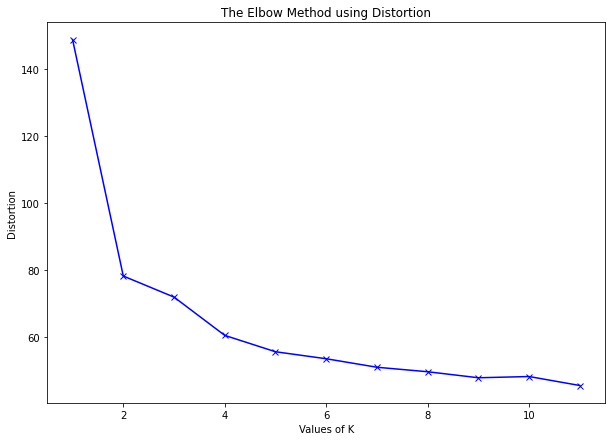

In [44]:
plt.figure(figsize=(10, 7))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [45]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 14460463427.925062
2 : 4731352538.039366
3 : 3369791527.2322187
4 : 2120331641.7730384
5 : 1676068180.965506
6 : 1433723575.9318585
7 : 1308560642.5369618
8 : 1190461897.8318682
9 : 1076449628.206649
10 : 971118296.229404
11 : 899199190.2537186


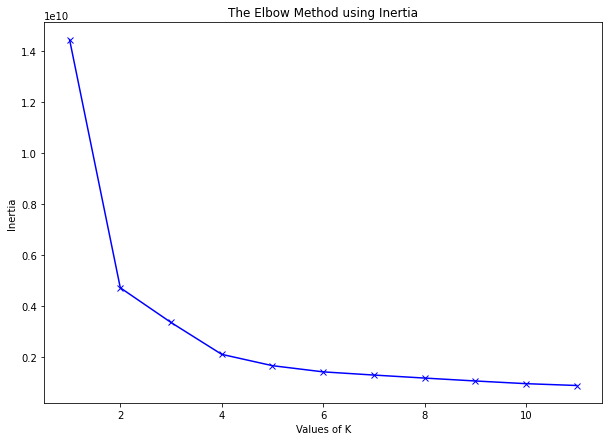

In [46]:
plt.figure(figsize=(10, 7))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

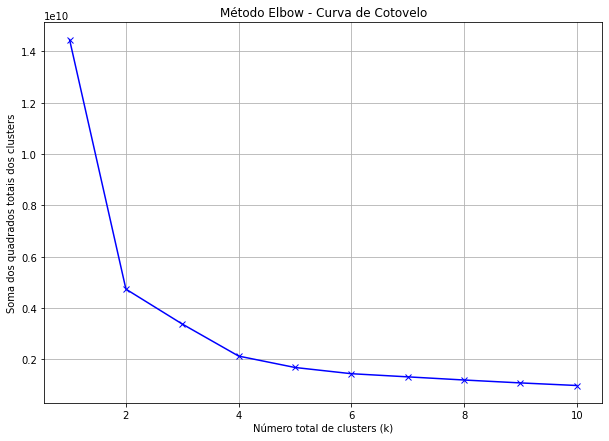

In [47]:
# Cria a Curva de Cotovelo para encontrar o Numero Ideal de Clusters
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(uniao)
    wcss.append(kmeans.inertia_)
    
# Mostra o Gráfico
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), wcss, '-bx')
plt.title('Método Elbow - Curva de Cotovelo')
plt.xlabel('Número total de clusters (k)')
plt.ylabel('Soma dos quadrados totais dos clusters') #within cluster sum of squares
plt.grid()
plt.show()

# **7) CONCLUSÃO**

O método que melhor representa os níveis de queda de raios em São José dos Campos/SP para este estudo é a tarefa de machine learning não supervisionada com dados absolutos sem padronização, por apresentar sentido físico ao que foi proposto no trabalho de TCC, o qual foi identificar os níveis de risco de queda de raios a partir de dados de campo elétrico para este municipio. 